In [1]:
from get_distillation_profile import get_distillation_profile
from distillation_profile_fitting import gamma_fit, gamma_mixture_distillation_profile
import matplotlib.pyplot as plt

# Distillation Profile of a Blend of Oils

This notebook goes through a model which estimates the distillation profile of a blend of two crudes, given their individual distillation profiles. The model consists of a gamma mixture model since, as discussed below, previous work has shown that gamma distributions can be used to predict the phase behavior of hydrocarbon mixtures. 

## Table of contents

- **1. Get distillation profile data**
- **2. Distillation curve fitting using the Gamma distribution**
- **3. Distillation profile of a crude mixture**
    - **3.1 Gamma mixture model**
- **4. Model Limitations and Improvements**

---

### 1. Get distillation profile data

Before going into the modeling, we need to get the distillation data for different crude oils. The `get_distillation_profile` function (see [get_distillation_profile.py](https://github.com/RobBlumberg/validere_distillation/blob/master/src/get_distillation_profile.py)) pulls this data from https://crudemonitor.ca/, given a crude oil acronym (**crude_name**) and **date**.

We can see the most recent distillation profile for "MGS" below, stored in a pandas dataframe.

In [2]:
crude = "MGS"
date = "recent"
get_distillation_profile(crude, date)

,Temperature( oC ),Average( oC ),Standard Deviation( oC )
IBP,32.9,33.8,1.2
5,42.7,40.7,5.3
10,84.3,66.2,16.5
20,115.7,106.0,20.3
30,169.4,165.8,35.5
40,232.2,248.2,50.6
50,302.1,331.9,51.9
60,372.2,411.5,50.9
70,450.2,494.0,57.9
80,551.0,594.7,65.9


### 2. Distillation curve fitting using the Gamma distribution

We now have the distillation data, expressing the temperatures at which X% of the crude oil has evaporated. As discussed [here](https://digital.library.adelaide.edu.au/dspace/bitstream/2440/88659/8/02whole.pdf) (See reference Riazi 2005), the gamma distribution has been used in the past to model properties of hydrocarbon mixtures. Of particular interest in this case is the use of the gamma distribution to model the distillation profile of a crude oil. In fact, we can fit a gamma distribution CDF to the distribution profile, as done by the `gamma_fit` (see [distillation_profile_fitting.py](https://github.com/RobBlumberg/validere_distillation/blob/master/src/distillation_profile_fitting.py)) function below. This function takes a crude oil acronym (again, **crude_name**) and a **date**, as before, and fits the gamma CDF to the data directly. 

As a reminder, the gamma distribution is parametrized by two parameters: $\alpha$ and $\beta$. The PDF and CDF are shown below:

$f(x, \alpha, \beta) = \frac{\beta^{\alpha} x^{\alpha-1} e^{-\beta x}}{\Gamma(\alpha)}$ (PDF) 

$F(x, \alpha, \beta) = \int_{0} ^ x f(x', \alpha, \beta) \; dx'$ (CDF)

where $\Gamma$ is the gamma function.

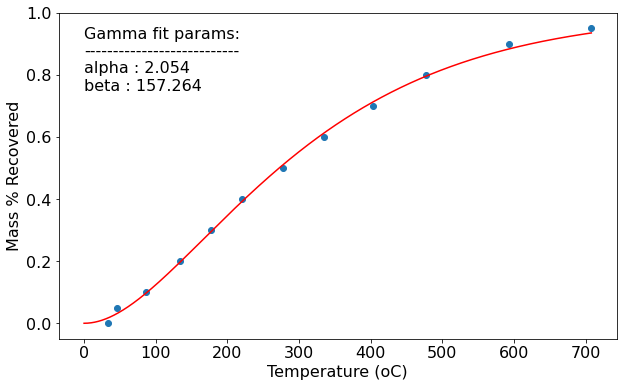

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
results = gamma_fit("RA", ax, date="recent");

Above, a gamma CDF has been fit to the most recent distillation profile of the "RA" crude. We can see that visually, the gamma CDF fits the data well.

### 3. Distillation profile of a crude mixture

#### 3.1 Gamma mixture model

Given two separate crude oils, we can fit two separate gamma CDFs to each distillation profile. But what if these two crudes were mixed together? Well one simple way of modeling the resulting distillation profile is through a gamma mixture model, shown below,

$F(x) = \pi_1 F(x, \alpha_1, \beta_1) + \pi_2 F(x, \alpha_2, \beta_2)$.

Here, $\alpha_i$ and $\beta_i$ would be the parameters determined from the fits performed on each individual oil's distillation profile ($i=1,2$). The parameters $\pi_i$ ($i=1,2$) represent the fraction of each oil which make up the mixture. In this equation, we can see that with $\pi_1=0$, we recover the distribution curve of crude 2, and vice versa.

In this case, the mixture model makes the assumptions that the underlying data come from sub-population components which are independent of one another, and which simply mix based on their proportions in the overall population to yield a net distribution that describes the entire population. As such, this model makes the assumption that the molecules from each crude evaporate under the same probabilistic distributions as they did when unmixed. Physically, this is saying that the strength of the intermolecular forces which prevent the molecules from escaping the liquid mixture are the same as when the crudes were unmixed.

The `gamma_mixture_distillation_profile` (see [distillation_profile_fitting.py](https://github.com/RobBlumberg/validere_distillation/blob/master/src/distillation_profile_fitting.py)) function below implements the gamma mixture model, given the acronym of two crudes (**crude1**, **crude2**), and volumes for each crude that make up the hypothetical mixture. These volumes define the fraction of each oil which make up the mixture, $\pi_i$.

In [4]:
crude1 = "MGS"
crude2 = "RA"
vol1 = 10
vol2 = 5

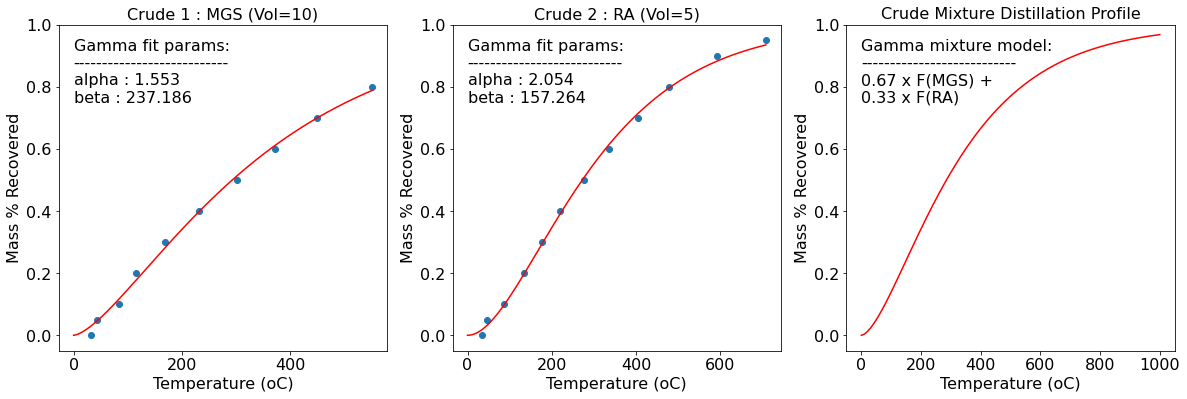

In [5]:
mixture = gamma_mixture_distillation_profile(crude1, crude2, vol1, vol2)

We can see the resultant distillation profile curve in the third plot on the right above. There, the two crude gamma distributions have been mixed according to a $2:1$ volume proportion. A **snapshot of the mixture function** with the standard mass % recovered values of interest is shown in the table below.

In [6]:
mixture[0]

,Mass % Recovered,Temperature (oC)
0,0.05,49
1,0.10,78
2,0.20,129
3,0.30,177
4,0.40,228
5,0.50,284
6,0.60,348
7,0.70,428
8,0.80,535
9,0.90,713


**Other Mixture Distillation Curve Results:**

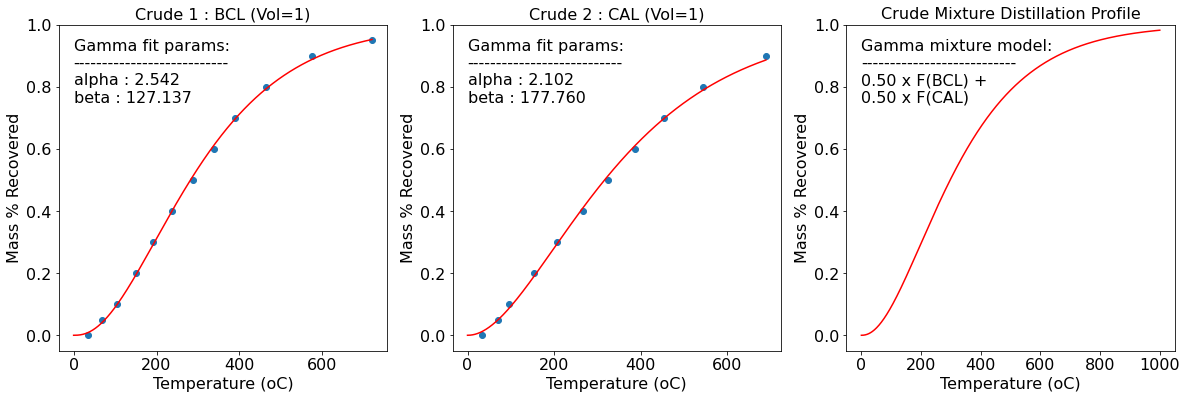

In [9]:
crude1 = "BCL"
crude2 = "CAL"
vol1 = 1
vol2 = 1
mixture = gamma_mixture_distillation_profile(crude1, crude2, vol1, vol2)

**Mixture function snapshot:**

In [10]:
mixture[0]

,Mass % Recovered,Temperature (oC)
0,0.05,72
1,0.10,104
2,0.20,154
3,0.30,200
4,0.40,247
5,0.50,296
6,0.60,352
7,0.70,420
8,0.80,510
9,0.90,655


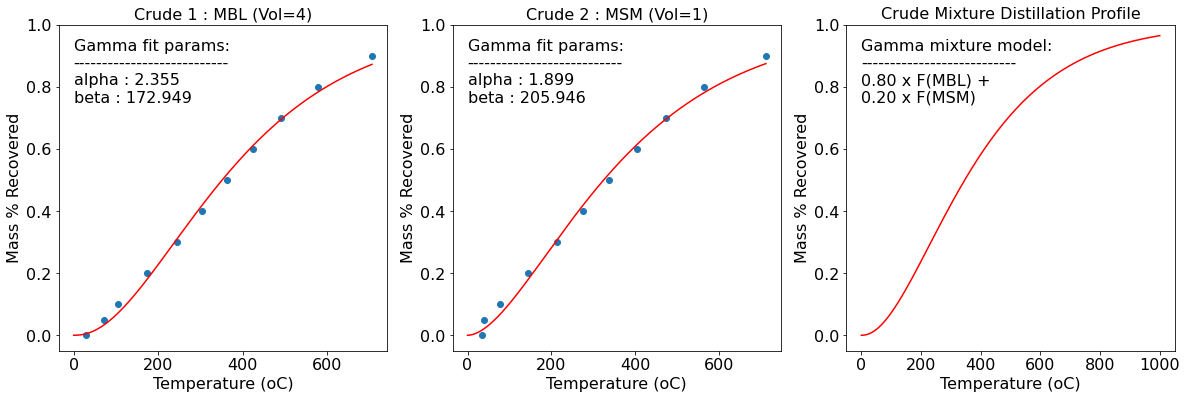

In [11]:
crude1 = "MBL"
crude2 = "MSM"
vol1 = 4
vol2 = 1
mixture = gamma_mixture_distillation_profile(crude1, crude2, vol1, vol2)

**Mixture function snapshot:**

In [12]:
mixture[0]

,Mass % Recovered,Temperature (oC)
0,0.05,81
1,0.10,118
2,0.20,178
3,0.30,232
4,0.40,287
5,0.50,345
6,0.60,411
7,0.70,490
8,0.80,595
9,0.90,762


### 4. Model Limitations and Improvements 

The gamma mixture model produced here makes several statistical and physical assumptions about the underlying data, some of which may in fact not be completely accurate. First, it assumes that the molecules evaporate under a gamma distribution. This assumption appears to be valid based on the curve fitting and visual inspection. However, other distributional assumptions could in principle be made and their goodness of fits could be compared to that of the gamma distribution (via RMSE for instance). 

The main limitations come in the mixture model. Recall that the model simply mixes two individual gamma CDFs based on the volume proportions of each crude. However, it would be more appropriate to determine these proportions using mass or molal fractions, since two volumes of different crudes may contain different numbers of molecules due to differences in density. This would, however, require the use of a density - temperature relationship for each crude to determine the mass proportions from the input volumes. 

The second physical assumption made in the gamma mixture model is that the strength of the intermolecular forces within each crude are unchanged when mixed. This assumption was introduced through the fact that the parameters from each component of the mixture are unchanged when the crudes were added together. However, this may in fact not be the case, especially when mixing two crudes whose molecules have vastly differing structures, where interactions between the two crudes could yield different intermolecular forces. Thus, it would be interesting to attempt to capture these interactions. This could be done by fitting a mixed gamma model to a known mixture of crudes, and comparing the parameter values to those obtained by fitting each crude's distillation curve individually. However, this would require distillation profile data of a known mix of crudes, which was not available in this case.